In [367]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [368]:
conn = sqlite3.connect('Data/im.db')


In [369]:
imdb_movie_ratings = imdb_movie_ratings[(imdb_movie_ratings['original_title'].isin(titles))| (imdb_movie_ratings['primary_title'].isin(titles))]

imdb_movie_ratings



,primary_title,original_title,runtime_minutes,genres
3,The Legend of Hercules,The Legend of Hercules,99.0,"Action,Adventure,Fantasy"
6,The Hammer,Hamill,108.0,"Biography,Drama,Sport"
10,Baggage Claim,Baggage Claim,96.0,Comedy
16,Moneyball,Moneyball,133.0,"Biography,Drama,Sport"
17,Hereafter,Hereafter,129.0,"Drama,Fantasy,Romance"
...,...,...,...,...
73568,Let Me In,Let Me In,74.0,Horror
73587,Edmond,Edmond,110.0,"Comedy,Drama,History"
73712,Teefa in Trouble,Teefa in Trouble,155.0,"Action,Comedy,Crime"
73787,Heroes,Heroes,88.0,Documentary


In [370]:
imdb_movie_ratings = pd.read_sql('''
SELECT *

FROM movie_ratings
    JOIN movie_basics
    USING (movie_id)

''', conn)
imdb_movie_ratings = imdb_movie_ratings.drop(['movie_id', 'averagerating', 'numvotes', 'start_year'], axis = 1)

In [371]:
people = pd.read_sql('''
SELECT p.person_id, p.category, mb.primary_title, pe.primary_name

FROM principals as p
    JOIN movie_basics as mb
    USING(movie_id)
    JOIN persons as pe
    USING (person_id)
    
''', conn)



In [372]:
reg_lang = pd.read_sql('''
SELECT mak.language, mak.region, mb.primary_title

FROM movie_akas as mak
    JOIN movie_basics as mb
    USING(movie_id)
    
    
''', conn)

reg_lang_money = pd.merge(reg_lang, budget_gross_cleaned, left_on = 'primary_title', right_on = 'title')
reg_lang_money

,language,region,primary_title,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
0,bg,BG,Jurassic World,Jurassic World,Uni.,1019.4,2015.0,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,3.033817,0.000005,7.669092
1,None,JP,Jurassic World,Jurassic World,Uni.,1019.4,2015.0,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,3.033817,0.000005,7.669092
2,None,BR,Jurassic World,Jurassic World,Uni.,1019.4,2015.0,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,3.033817,0.000005,7.669092
3,None,BR,Jurassic World,Jurassic World,Uni.,1019.4,2015.0,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,3.033817,0.000005,7.669092
4,None,FR,Jurassic World,Jurassic World,Uni.,1019.4,2015.0,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,3.033817,0.000005,7.669092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44602,None,CZ,Aladdin,Aladdin,NaN,372500000.0,NaN,81.0,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,1.355683,2.046703,3.402386
44603,None,CZ,Aladdin,Aladdin,NaN,286700000.0,NaN,33.0,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,7.762508,10.239286,18.001794
44604,None,None,Never Again,Never Again,NaN,1162.0,NaN,47.0,"Jul 12, 2002",500000.0,307631.0,3.087930e+05,0.615262,0.002324,0.617586
44605,en,XWW,Never Again,Never Again,NaN,1162.0,NaN,47.0,"Jul 12, 2002",500000.0,307631.0,3.087930e+05,0.615262,0.002324,0.617586


In [373]:
people = people[people['primary_title'].isin(titles)]
people.primary_title.value_counts()

primary_title
Home                           128
The Return                     126
The Gift                        99
Forget Me Not                   87
Freedom                         85
                              ... 
Step Up                          1
The Touch                        1
Ghost Town                       1
Cube                             1
The Best Years of Our Lives      1
Name: count, Length: 2088, dtype: int64

In [374]:
imdb_ratings_money = pd.merge(imdb_movie_ratings, budget_gross_cleaned, left_on = 'primary_title', right_on = 'title')
imdb_ratings_money = imdb_ratings_money.drop(['primary_title', 'original_title', 'studio', 'year', 'id', 'release_date'], axis = 1)

In [375]:
people

,person_id,category,primary_title,primary_name
36,nm0005683,cinematographer,"Hail, Caesar!",Roger Deakins
37,nm0000982,actor,"Hail, Caesar!",Josh Brolin
38,nm0000123,actor,"Hail, Caesar!",George Clooney
39,nm2403277,actor,"Hail, Caesar!",Alden Ehrenreich
40,nm0000146,actor,"Hail, Caesar!",Ralph Fiennes
...,...,...,...,...
1026920,nm9952460,producer,Never Again,Katie Watling
1026921,nm9952477,composer,Never Again,Ben Gordelia
1026922,nm9953797,cinematographer,Never Again,Michael Wooley
1027885,nm3868049,actor,Fuel,Maarten Wijsman


In [376]:
low_budget_ratings = imdb_ratings_money[imdb_ratings_money['production_budget'] < 5000000]


In [377]:


mid_budget_ratings = imdb_ratings_money[(imdb_ratings_money['production_budget'] > 5000000) & (imdb_ratings_money['production_budget'] < 50000000)]

In [378]:
high_budget_ratings = imdb_ratings_money[imdb_ratings_money['production_budget'] > 50000000]

In [379]:
low_budget.describe().iloc[:,-3:]


,domestic_success,foreign_success,WW_success
count,1104.000000,1104.000000,1104.000000
mean,9.171927,3.877350,13.057042
std,59.100067,20.918187,66.335127
min,0.000000,0.000000,0.000026
25%,0.075408,0.000000,0.212978
50%,0.941282,0.015809,1.686642
75%,4.895456,1.033265,7.058571
max,1800.000000,455.000000,1800.000000


In [380]:
mid_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,2975.000000,2975.000000,2975.000000
mean,1.743540,1.330433,3.072227
std,2.633854,2.729720,4.748629
min,0.000000,0.000000,0.000125
25%,0.318128,0.005589,0.625621
50%,0.997365,0.396364,1.722419
75%,2.157811,1.495109,3.609725
max,41.908910,43.675071,75.520507


In [381]:
high_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,1073.000000,1073.000000,1073.000000
mean,1.162799,1.640720,2.817022
std,0.890666,1.484321,2.224842
min,0.000000,0.000000,0.007943
25%,0.556753,0.648000,1.295164
50%,0.934403,1.278333,2.284781
75%,1.512535,2.241389,3.667582
max,6.303232,12.494545,16.489089


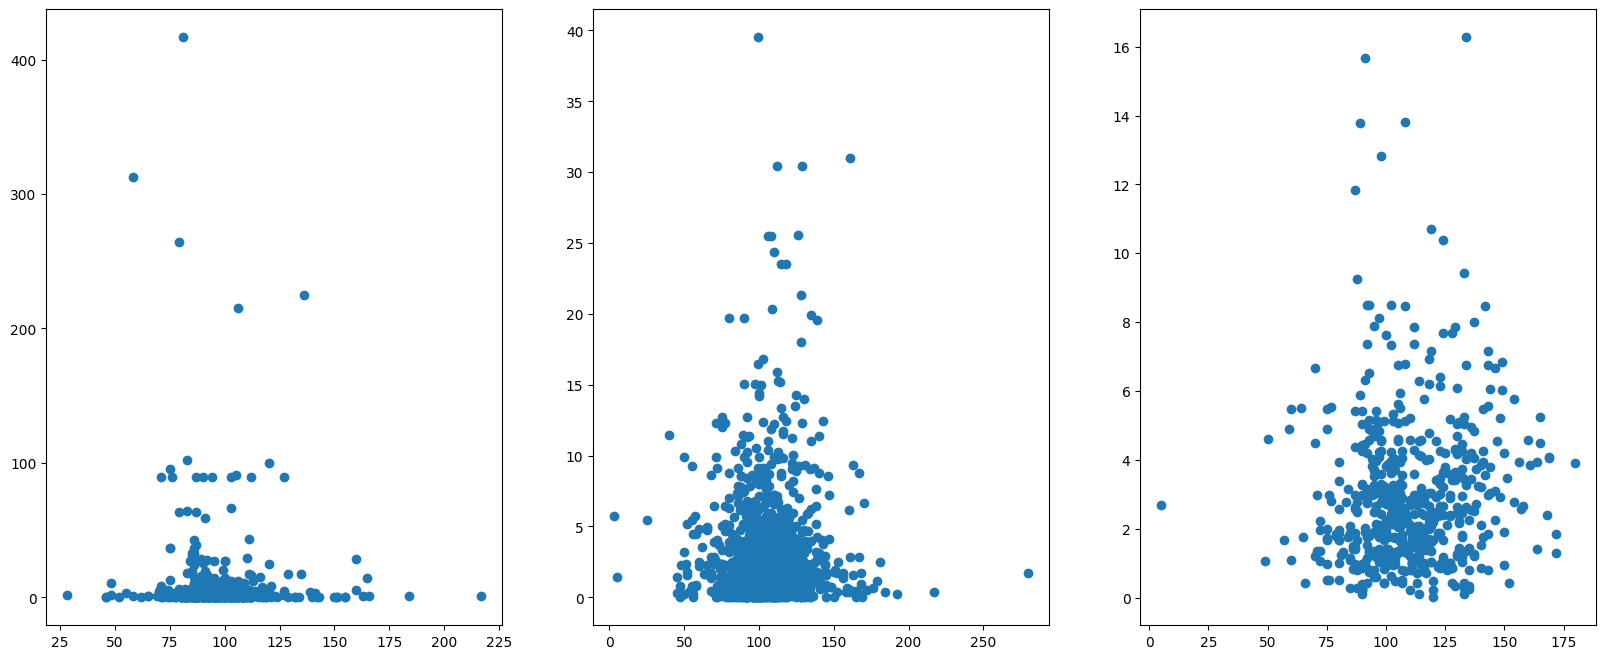

In [382]:
fig, ax = plt.subplots(1,3, figsize = (20,8))

ax[0].scatter(low_budget_ratings['runtime_minutes'], low_budget_ratings['WW_success'])


ax[1].scatter(mid_budget_ratings['runtime_minutes'], mid_budget_ratings['WW_success'])
ax[2].scatter(high_budget_ratings['runtime_minutes'], high_budget_ratings['WW_success'])
                    

In [383]:
genres_low_budget

,runtime_minutes,genres,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
12,92.0,"Drama,Romance,Sci-Fi",Another Earth,456000.0,175000.0,1321194.0,2102779.0,7.549680,2.605714,12.015880
20,95.0,"Comedy,Drama,Romance",The Spectacular Now,63980.0,2500000.0,6852971.0,6916951.0,2.741188,0.025592,2.766780
50,75.0,"Animation,Family,Fantasy",Pinocchio,0.0,2289247.0,84300000.0,84300000.0,36.824336,0.000000,36.824336
51,NaN,"Family,Fantasy",Pinocchio,0.0,2289247.0,84300000.0,84300000.0,36.824336,0.000000,36.824336
52,75.0,Documentary,Pinocchio,0.0,2289247.0,84300000.0,84300000.0,36.824336,0.000000,36.824336
...,...,...,...,...,...,...,...,...,...,...
1737,108.0,Drama,All Saints,140000.0,2000000.0,5802208.0,5941994.0,2.901104,0.070000,2.970997
1744,87.0,"Comedy,Romance",Bachelorette,11500000.0,3000000.0,446770.0,12577401.0,0.148923,3.833333,4.192467
1748,93.0,"Adventure,Drama,Fantasy",Beasts of the Southern Wild,8300000.0,1800000.0,12795746.0,23265132.0,7.108748,4.611111,12.925073
1756,86.0,Drama,Fantasia,0.0,2280000.0,83320000.0,83320000.0,36.543860,0.000000,36.543860


In [384]:
low_budget

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
41,Paranormal Activity 2,Par.,92800000.0,2010.0,65.0,"Oct 20, 2010",3000000.0,84752907.0,177512032.0,28.250969,30.933333,59.170677
89,The Last Exorcism,LGF,26700000.0,2010.0,15.0,"Aug 27, 2010",1800000.0,41034350.0,70165900.0,22.796861,14.833333,38.981056
127,The Kids Are All Right,Focus,13900000.0,2010.0,87.0,"Jul 9, 2010",4000000.0,20811365.0,36275469.0,5.202841,3.475000,9.068867
149,Buried,LGF,18100000.0,2010.0,2.0,"Sep 24, 2010",1987650.0,1044143.0,21270290.0,0.525315,9.106231,10.701225
153,Soul Kitchen,IFC,17600000.0,2010.0,3.0,"Aug 20, 2010",4900000.0,276901.0,23347461.0,0.056510,3.591837,4.764788
...,...,...,...,...,...,...,...,...,...,...,...,...
6355,Cavite,NaN,1573.0,NaN,76.0,"May 26, 2006",7000.0,70071.0,71644.0,10.010143,0.224714,10.234857
6356,The Mongol King,NaN,0.0,NaN,77.0,"Dec 31, 2004",7000.0,900.0,900.0,0.128571,0.000000,0.128571
6357,Following,NaN,192013.0,NaN,79.0,"Apr 2, 1999",6000.0,48482.0,240495.0,8.080333,32.002167,40.082500
6358,Return to the Land of Wonders,NaN,0.0,NaN,80.0,"Jul 13, 2005",5000.0,1338.0,1338.0,0.267600,0.000000,0.267600


In [385]:
mid_budget

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
14,The Karate Kid,Sony,182500000.0,2010.0,77.0,"Jun 11, 2010",40000000.0,176591618.0,351774938.0,4.414790,4.562500,8.794373
15,The Karate Kid,Sony,182500000.0,2010.0,63.0,"Jun 22, 1984",8000000.0,90815558.0,90815558.0,11.351945,22.812500,11.351945
17,Black Swan,FoxS,222400000.0,2010.0,46.0,"Dec 3, 2010",13000000.0,106954678.0,331266710.0,8.227283,17.107692,25.482055
31,True Grit,Par.,81000000.0,2010.0,29.0,"Dec 22, 2010",35000000.0,171243005.0,252276928.0,4.892657,2.314286,7.207912
34,The Social Network,Sony,128000000.0,2010.0,91.0,"Oct 1, 2010",40000000.0,96962694.0,224922135.0,2.424067,3.200000,5.623053
...,...,...,...,...,...,...,...,...,...,...,...,...
5240,The Girl with all the Gifts,NaN,4801837.0,NaN,43.0,"Feb 24, 2017",5250000.0,0.0,4801837.0,0.000000,0.914636,0.914636
5241,Wilson,NaN,0.0,NaN,44.0,"Aug 1, 1944",5200000.0,2000000.0,2000000.0,0.384615,0.000000,0.384615
5242,Saint Ralph,NaN,900000.0,NaN,45.0,"Aug 5, 2005",5200000.0,795126.0,1695126.0,0.152909,0.173077,0.325986
5243,Dum Maaro Dum,NaN,11068938.0,NaN,46.0,"Apr 22, 2011",5200000.0,564489.0,11633427.0,0.108556,2.128642,2.237198


In [386]:
high_budget

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
0,Toy Story 3,BV,652000000.0,2010.0,47.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,2.075024,3.260000,5.344398
3,Inception,WB,535700000.0,2010.0,38.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,1.828601,3.348125,5.222029
4,Shrek Forever After,P/DW,513900000.0,2010.0,27.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,1.446890,3.114545,4.583301
5,The Twilight Saga: Eclipse,Sum.,398000000.0,2010.0,53.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08,4.419585,5.852941,10.383865
6,Iron Man 2,Par.,311500000.0,2010.0,15.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08,1.837843,1.832353,3.653861
...,...,...,...,...,...,...,...,...,...,...,...,...
2769,From Paris With Love,NaN,29061741.0,NaN,75.0,"Feb 5, 2010",52000000.0,24077427.0,5.313917e+07,0.463027,0.558880,1.021907
2770,Bulletproof Monk,NaN,0.0,NaN,76.0,"Apr 16, 2003",52000000.0,23010607.0,2.301061e+07,0.442512,0.000000,0.442512
2771,"Me, Myself & Irene",NaN,58700000.0,NaN,77.0,"Jun 23, 2000",51000000.0,90570999.0,1.492710e+08,1.775902,1.150980,2.926882
2772,Barnyard: The Original Party Animals,NaN,45804844.0,NaN,78.0,"Aug 4, 2006",51000000.0,72779000.0,1.185838e+08,1.427039,0.898134,2.325173


In [387]:
low_budget.describe()

,foreign_gross,year,id,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
count,1.104000e+03,76.000000,1104.000000,1.104000e+03,1.104000e+03,1.104000e+03,1104.000000,1104.000000,1104.000000
mean,4.289926e+06,2012.315789,49.422101,1.901842e+06,7.594724e+06,1.188825e+07,9.171927,3.877350,13.057042
std,1.645862e+07,2.488429,28.359327,1.376585e+06,1.806141e+07,2.972851e+07,59.100067,20.918187,66.335127
min,0.000000e+00,2010.000000,1.000000,1.100000e+03,0.000000e+00,2.600000e+01,0.000000,0.000000,0.000026
25%,0.000000e+00,2010.000000,25.000000,7.492500e+05,9.182575e+04,2.149535e+05,0.075408,0.000000,0.212978
50%,1.665450e+04,2011.500000,49.000000,1.700000e+06,1.066455e+06,2.392622e+06,0.941282,0.015809,1.686642
75%,1.278550e+06,2014.000000,73.250000,3.000000e+06,7.011462e+06,1.026181e+07,4.895456,1.033265,7.058571
max,2.152993e+08,2018.000000,100.000000,4.900000e+06,1.986805e+08,3.905252e+08,1800.000000,455.000000,1800.000000


In [389]:
low_budget_ratings['genres'] = low_budget_ratings['genres'].str.split(',')
mid_budget_ratings['genres'] = mid_budget_ratings['genres'].str.split(',')
high_budget_ratings['genres'] = high_budget_ratings['genres'].str.split(',')

In [391]:
low_budget_genres = low_budget_ratings.explode('genres')
mid_budget_genres = mid_budget_ratings.explode('genres')
high_budget_genres = high_budget_ratings.explode('genres')

In [392]:
high_budget_genres.groupby('genres').agg(
  avg_wwratio=('WW_success', 'mean'),
  rng=("WW_success", lambda x: (max(x) - min(x))))

,avg_wwratio,rng
genres,,
Action,2.864333,13.802843
Adventure,3.377832,15.672276
Animation,3.965981,15.416554
Biography,3.534412,16.002074
Comedy,3.335743,15.562981
Crime,2.388188,7.722891
Documentary,2.001001,5.203836
Drama,2.543846,16.264518
Family,3.027948,8.231997


In [393]:
high_budget_genres['genres'].value_counts()

genres
Adventure      273
Action         263
Drama          169
Comedy         152
Animation       87
Sci-Fi          85
Thriller        81
Fantasy         73
Crime           49
Family          48
Horror          30
Mystery         26
Documentary     25
Romance         24
Biography       22
History         11
Musical          8
Sport            6
War              4
Western          4
Music            2
Name: count, dtype: int64

In [394]:
mid_budget_genres.groupby('genres').agg(
  avg_wwratio=('WW_success', 'mean'),
  rng=("WW_success", lambda x: (max(x) - min(x))))

,avg_wwratio,rng
genres,,
Action,2.744433,31.016138
Adventure,2.444137,18.001309
Animation,2.170929,14.439274
Biography,2.764647,31.012152
Comedy,2.968782,24.362710
Crime,2.153716,19.534314
Documentary,2.935400,19.677644
Drama,2.739058,31.016044
Family,3.409208,30.411688


In [396]:
mid_budget_genres['genres'].value_counts()

genres
Drama          831
Comedy         390
Action         258
Thriller       243
Crime          216
Romance        203
Horror         149
Biography      139
Adventure      117
Mystery        109
Documentary     89
Sci-Fi          67
Family          62
Fantasy         59
History         49
Music           45
Sport           34
War             29
Animation       29
Musical          6
Western          5
News             2
Name: count, dtype: int64

In [395]:
low_budget_genres.groupby('genres').agg(
  median_wwratio=('WW_success', 'median'),
  rng=("WW_success", lambda x: (max(x) - min(x))))

,median_wwratio,rng
genres,,
Action,0.495899,224.999974
Adventure,0.388954,89.585736
Animation,36.824336,89.029276
Biography,0.338855,312.350668
Comedy,0.653821,224.999974
Crime,0.936367,63.117534
Documentary,0.623237,312.354120
Drama,1.079151,224.999974
Family,1.115523,90.892991


In [397]:
low_budget_genres['genres'].value_counts()

genres
Drama          283
Comedy         112
Horror          93
Thriller        84
Romance         65
Documentary     58
Crime           41
Action          41
Mystery         41
Sci-Fi          26
Adventure       25
Fantasy         23
Music           19
Family          18
Biography       16
Sport           13
History          7
War              5
Western          4
Musical          4
Animation        3
News             1
Name: count, dtype: int64

In [400]:
low_budget_rt_nonan = low_budget_ratings.dropna()
mid_budget_rt_nonan = mid_budget_ratings.dropna()
high_budget_rt_nonan = high_budget_ratings.dropna()

Our regression line is: y = -0.12492x + 22.1747


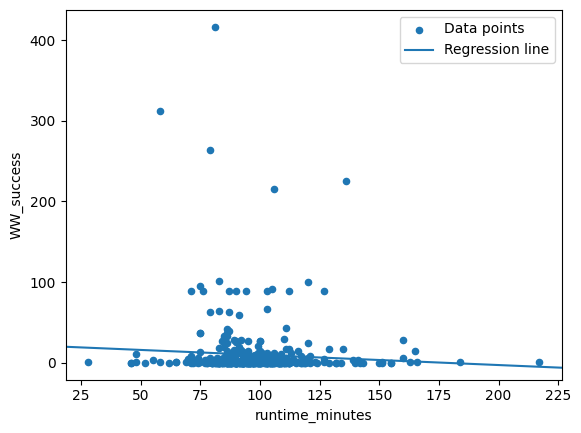

In [401]:
rho = np.corrcoef(low_budget_rt_nonan["runtime_minutes"], low_budget_rt_nonan["WW_success"])[0][1]
s_y = low_budget_rt_nonan["WW_success"].std()
s_x = low_budget_rt_nonan["runtime_minutes"].std()
m = rho * s_y / s_x


mean_y = low_budget_rt_nonan["WW_success"].mean()
mean_x = low_budget_rt_nonan["runtime_minutes"].mean()
c = mean_y - m * mean_x
model = sm.OLS(endog=low_budget_rt_nonan["WW_success"], exog=sm.add_constant(low_budget_rt_nonan["runtime_minutes"]))
print(f"Our regression line is: y = {round(m, 5)}x + {round(c, 5)}")
results_low = model.fit()

fig, ax = plt.subplots()
low_budget_rt_nonan.plot.scatter(x="runtime_minutes", y="WW_success", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results_low, label="Regression line", ax=ax)
ax.legend();


In [402]:
results_low.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             WW_success   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.216
Date:                Wed, 03 Jan 2024   Prob (F-statistic):              0.137
Time:                        09:23:01   Log-Likelihood:                -2315.2
No. Observations:                 468   AIC:                             4634.
Df Residuals:                     466   BIC:                             4643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              22.1747      8.339      2.659      0.008       5.788      38.561
runtime_minutes    -0.1249      0.084     -1.489      0.137      -0.290       0.040
==============================================================================
Omnibus:                      654.636   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88751.756
Skew:                           7.310   Prob(JB):                         0.00
Kurtosis:                      68.861   Cond. No.                         525.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our regression line is: y = 0.01102x + 1.7304


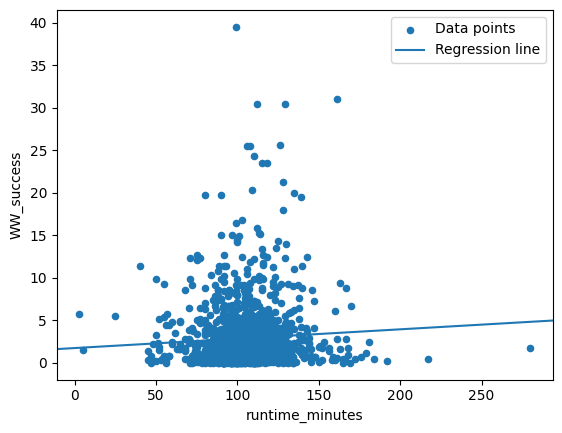

In [403]:
rho = np.corrcoef(mid_budget_rt_nonan["runtime_minutes"], mid_budget_rt_nonan["WW_success"])[0][1]
s_y = mid_budget_rt_nonan["WW_success"].std()
s_x = mid_budget_rt_nonan["runtime_minutes"].std()
m = rho * s_y / s_x


mean_y = mid_budget_rt_nonan["WW_success"].mean()
mean_x = mid_budget_rt_nonan["runtime_minutes"].mean()
c = mean_y - m * mean_x
model = sm.OLS(endog=mid_budget_rt_nonan["WW_success"], exog=sm.add_constant(mid_budget_rt_nonan["runtime_minutes"]))
print(f"Our regression line is: y = {round(m, 5)}x + {round(c, 5)}")
results_mid = model.fit()

fig, ax = plt.subplots()
mid_budget_rt_nonan.plot.scatter(x="runtime_minutes", y="WW_success", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results_mid, label="Regression line", ax=ax)
ax.legend();


In [404]:
results_mid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             WW_success   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.011
Date:                Wed, 03 Jan 2024   Prob (F-statistic):             0.0254
Time:                        09:23:05   Log-Likelihood:                -3691.5
No. Observations:                1340   AIC:                             7387.
Df Residuals:                    1338   BIC:                             7397.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7304      0.523      3.309      0.001       0.705       2.756
runtime_minutes     0.0110      0.005      2.238      0.025       0.001       0.021
==============================================================================
Omnibus:                     1039.426   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21570.847
Skew:                           3.489   Prob(JB):                         0.00
Kurtosis:                      21.375   Cond. No.                         534.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our regression line is: y = 0.00783x + 2.09906


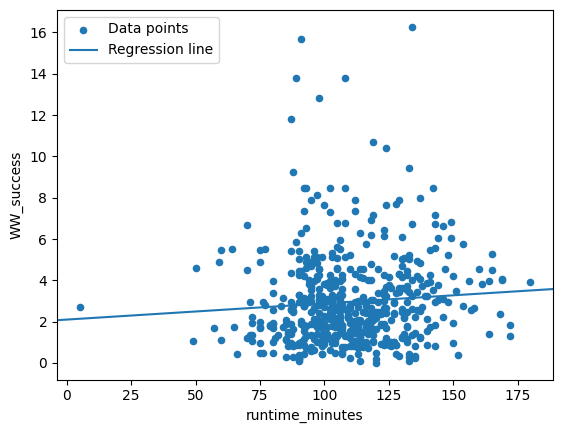

In [405]:
rho = np.corrcoef(high_budget_rt_nonan["runtime_minutes"], high_budget_rt_nonan["WW_success"])[0][1]
s_y = high_budget_rt_nonan["WW_success"].std()
s_x = high_budget_rt_nonan["runtime_minutes"].std()
m = rho * s_y / s_x


mean_y = high_budget_rt_nonan["WW_success"].mean()
mean_x = high_budget_rt_nonan["runtime_minutes"].mean()
c = mean_y - m * mean_x
model = sm.OLS(endog=high_budget_rt_nonan["WW_success"], exog=sm.add_constant(high_budget_rt_nonan["runtime_minutes"]))
print(f"Our regression line is: y = {round(m, 5)}x + {round(c, 5)}")
results_high = model.fit()

fig, ax = plt.subplots()
high_budget_rt_nonan.plot.scatter(x="runtime_minutes", y="WW_success", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results_high, label="Regression line", ax=ax)
ax.legend();


In [406]:
results_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             WW_success   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.186
Date:                Wed, 03 Jan 2024   Prob (F-statistic):             0.0748
Time:                        09:23:09   Log-Likelihood:                -1206.8
No. Observations:                 545   AIC:                             2418.
Df Residuals:                     543   BIC:                             2426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0991      0.492      4.265      0.000       1.132       3.066
runtime_minutes     0.0078      0.004      1.785      0.075      -0.001       0.016
==============================================================================
Omnibus:                      258.375   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1466.679
Skew:                           2.054   Prob(JB):                         0.00
Kurtosis:                       9.907   Cond. No.                         581.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [407]:
people_money = pd.merge(people, budget_gross_cleaned, left_on = 'primary_title', right_on = 'title')

In [408]:
people_money

,person_id,category,primary_title,primary_name,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
0,nm0005683,cinematographer,"Hail, Caesar!",Roger Deakins,"Hail, Caesar!",NaN,34080455.0,NaN,22.0,"Feb 5, 2016",22000000.0,30080225.0,64160680.0,1.367283,1.549112,2.916395
1,nm0000982,actor,"Hail, Caesar!",Josh Brolin,"Hail, Caesar!",NaN,34080455.0,NaN,22.0,"Feb 5, 2016",22000000.0,30080225.0,64160680.0,1.367283,1.549112,2.916395
2,nm0000123,actor,"Hail, Caesar!",George Clooney,"Hail, Caesar!",NaN,34080455.0,NaN,22.0,"Feb 5, 2016",22000000.0,30080225.0,64160680.0,1.367283,1.549112,2.916395
3,nm2403277,actor,"Hail, Caesar!",Alden Ehrenreich,"Hail, Caesar!",NaN,34080455.0,NaN,22.0,"Feb 5, 2016",22000000.0,30080225.0,64160680.0,1.367283,1.549112,2.916395
4,nm0000146,actor,"Hail, Caesar!",Ralph Fiennes,"Hail, Caesar!",NaN,34080455.0,NaN,22.0,"Feb 5, 2016",22000000.0,30080225.0,64160680.0,1.367283,1.549112,2.916395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29276,nm9457390,director,Beowulf,Chase Pottinger,Beowulf,NaN,112800000.0,NaN,88.0,"Nov 16, 2007",150000000.0,82280579.0,195080579.0,0.548537,0.752000,1.300537
29277,nm9457392,producer,Beowulf,Eerdun E,Beowulf,NaN,112800000.0,NaN,88.0,"Nov 16, 2007",150000000.0,82280579.0,195080579.0,0.548537,0.752000,1.300537
29278,nm9457388,producer,Beowulf,Junsheng Liu,Beowulf,NaN,112800000.0,NaN,88.0,"Nov 16, 2007",150000000.0,82280579.0,195080579.0,0.548537,0.752000,1.300537
29279,nm3868049,actor,Fuel,Maarten Wijsman,Fuel,NaN,0.0,NaN,35.0,"Nov 14, 2008",2500000.0,174255.0,174255.0,0.069702,0.000000,0.069702


In [409]:
people_money.groupby(['primary_name', 'category']).agg(
  median_wwratio=('WW_success', 'median'),
  rng=("WW_success", lambda x: (max(x) - min(x)))).sort_values('median_wwratio', ascending = False)

,,median_wwratio,rng
primary_name,category,,
Chris Lofing,director,416.564740,0.0
Pfeifer Brown,actress,416.564740,0.0
Benjamin Forkner,producer,416.564740,0.0
Reese Mishler,actor,416.564740,0.0
Travis Cluff,director,416.564740,0.0
...,...,...,...
Matt Odom,editor,0.000026,0.0
Tom Riordan,actor,0.000026,0.0
Jack Griffo,actor,0.000026,0.0


In [410]:
reg_lang_money.groupby('language').agg(
  mean_foreignratio=('foreign_success', 'mean'),
  rng=("WW_success", lambda x: (max(x) - min(x)))).sort_values('mean_foreignratio', ascending = False)

,mean_foreignratio,rng
language,,
id,7.964119,39.270431
ms,5.838000,0.000000
ja,5.555385,0.000000
hr,4.319700,66.568703
es,3.691638,101.124051
sr,3.293764,27.666042
cmn,3.146008,30.722943
hu,3.097919,12.706333
en,3.076113,215.384477


In [443]:
reg_lang_low_budget = pd.merge(reg_lang, low_budget, left_on = 'primary_title', right_on = 'title')
reg_lang_mid_budget = pd.merge(reg_lang, mid_budget, left_on = 'primary_title', right_on = 'title')
reg_lang_high_budget = pd.merge(reg_lang, high_budget, left_on = 'primary_title', right_on = 'title')

In [446]:
reg_lang_low_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)

,median_foreignratio,rng
language,,
es,24.415916,48.168169
yue,12.735053,24.384001
sr,5.890809,11.718063
ta,5.218493,0.000000
hr,2.571429,30.933333
de,2.398457,3.068037
fr,2.398457,202.000000
bs,1.866667,5.058421
bg,1.344000,89.555470
